<a href="https://colab.research.google.com/github/fitristachan/invoice-image-processing/blob/main/data_etl_invoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install datasets
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install Pillow
!pip install opencv-python

In [6]:
import os
from datasets import load_dataset
import shutil
import random
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=864x1296 at 0x7BFEB7D73F50>


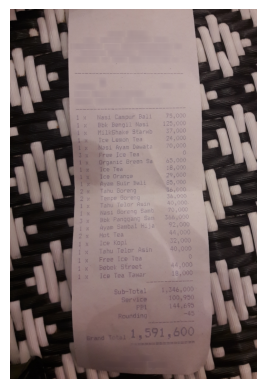

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Error dalam preprocess: operands could not be broadcast together with shapes (500,500) (3,) 


/usr/local/lib/python3.11/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Error dalam preprocess: operands could not be broadcast together with shapes (500,500) (3,) 


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Error dalam preprocess: operands could not be broadcast together with shapes (500,500) (3,) 
<PIL.TiffImagePlugin.TiffImageFile image mode=I size=500x500 at 0x7BFEBFD4B5D0>


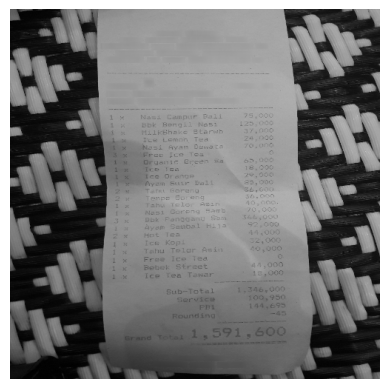

In [24]:
dataset = load_dataset("naver-clova-ix/cord-v2")
sample_image = dataset['train'][0]['image']
print(sample_image)

plt.imshow(sample_image)
plt.axis("off")
plt.show()


mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

def resize_image(image):
    """ Convert PIL image to NumPy array and resize """
    if isinstance(image, Image.Image):  # Jika image berupa PIL.Image, konversi ke NumPy array
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("resize_image: Input harus berupa NumPy array")

    return cv2.resize(image, (500, 500))

def grey_image(image):
    """ Convert image to grayscale """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("grey_image: Input harus berupa NumPy array")

    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def normalize_image(image):
    """ Normalize image using mean and std """
    if isinstance(image, Image.Image):
        image = np.array(image)

    if not isinstance(image, np.ndarray):
        raise ValueError("normalize_image: Input harus berupa NumPy array")

    image = image / 255.0
    image = (image - mean) / std

    return Image.fromarray((image * 255).astype(np.uint8))  # Kembalikan ke PIL image

def preprocess(batch):
    try:
        batch['image'] = [resize_image(img) for img in batch['image']]
        batch['image'] = [grey_image(img) for img in batch['image']]
        batch['image'] = [normalize_image(img) for img in batch['image']]

        return batch
    except Exception as e:
        print(f"Error dalam preprocess: {e}")
        return batch  # Supaya tidak crash

dataset = dataset.map(preprocess, batched=True, num_proc=1)  # Gunakan num_proc=1 dulu

sample_image_normalization = dataset['train'][0]['image']
print(sample_image_normalization)

plt.imshow(sample_image_normalization)
plt.axis("off")
plt.show()